# EDA and Data Preparation

## Package Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.cluster import KMeans

## Dataset Import

In [2]:
data = pd.read_csv('../data/hotel_booking.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


### Inspecting the Dataset - a Quick Look

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

There are some null values in a few columns. Only the company columns appears to have many of them. This is likely because most customers arrive and pay as individuals, but this should be further inspected nonetheless.

In [4]:
data.isna().sum().sort_values(ascending=False).head()

company              112593
agent                 16340
country                 488
children                  4
arrival_date_year         0
dtype: int64

In [15]:
na_without_company = data.drop(columns=["company"])[data.drop(columns=["company"]).isna().any(axis=1)]["hotel"].count()
round((na_without_company/len(data)) * 100, 2)

np.float64(13.82)

Without the company columns, null values can be found in 13.82% of our rows. We will decide what to do with them later.

In [17]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


It seems like we have some outliers. We will explore the dataset a bit further. Let's start with numerical columns.

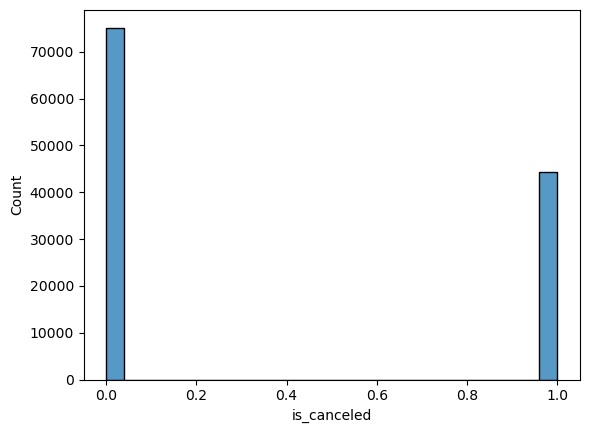

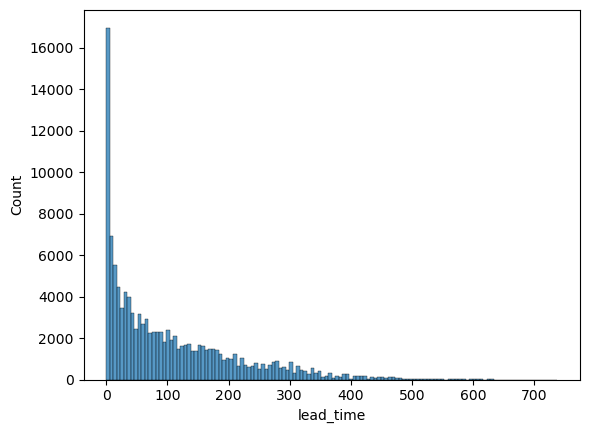

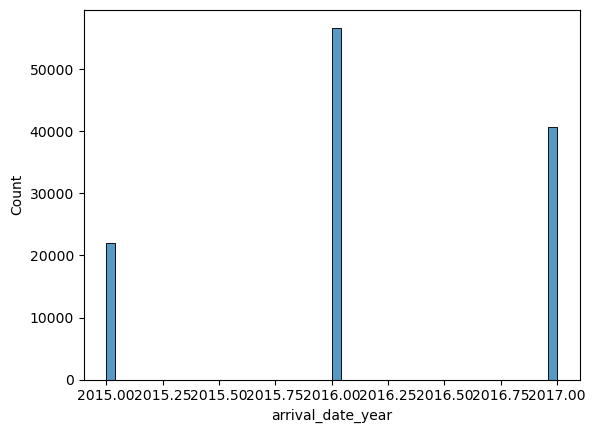

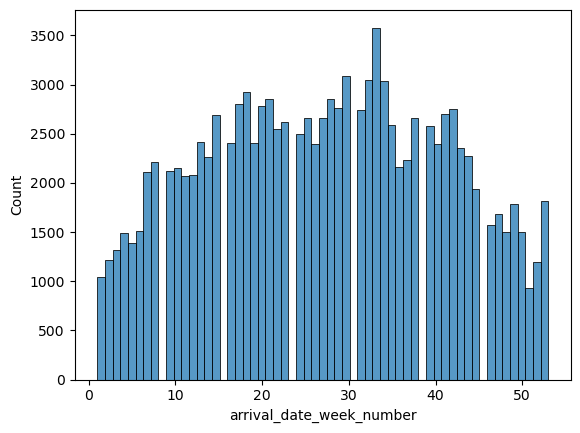

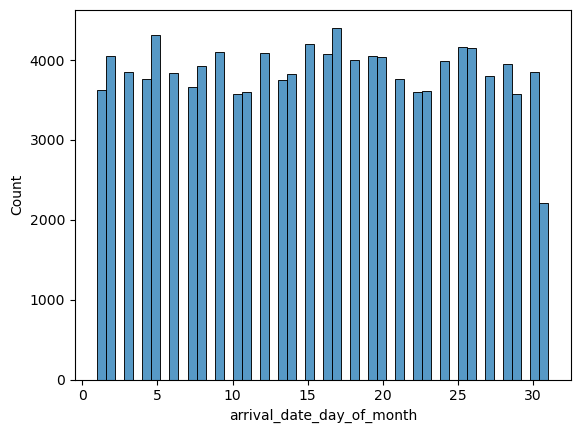

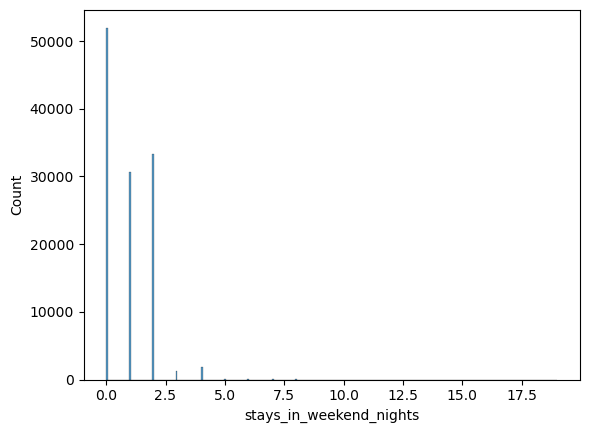

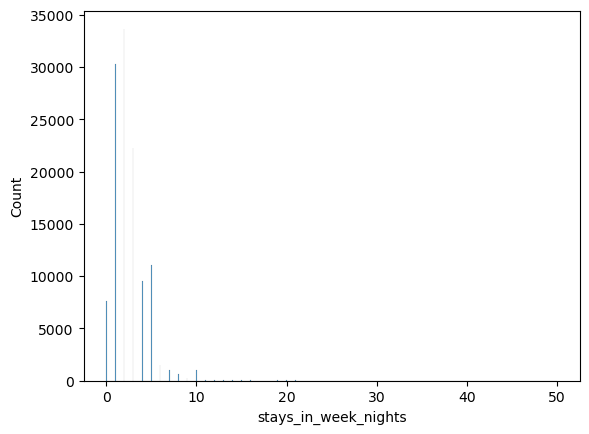

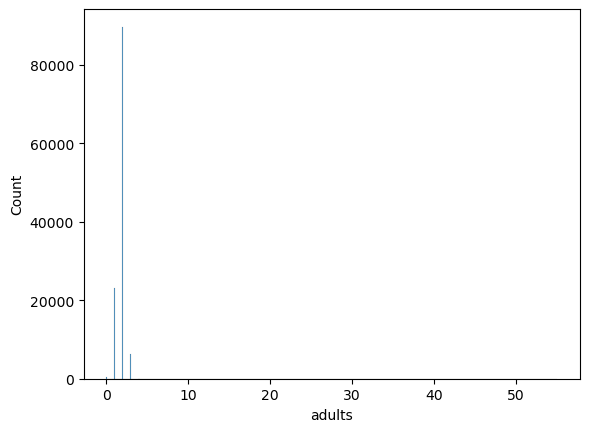

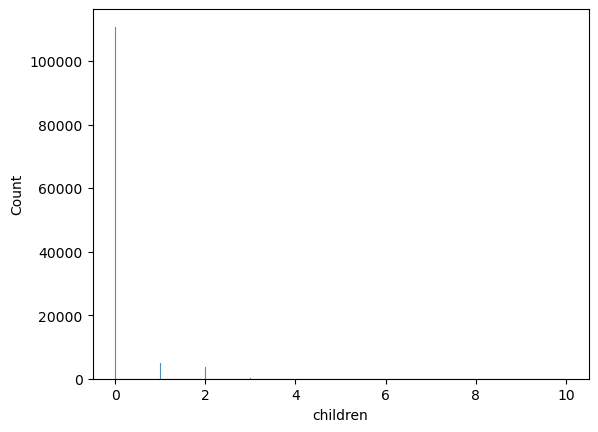

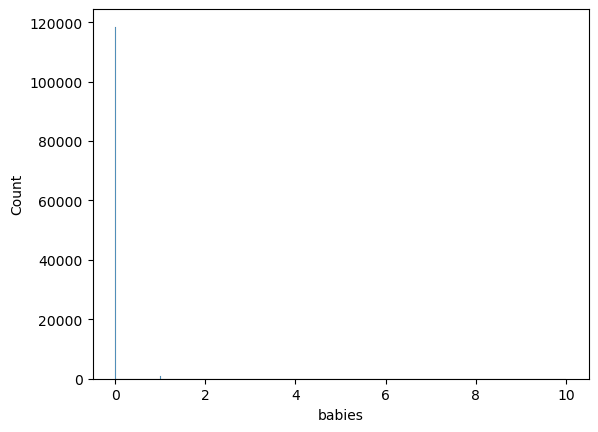

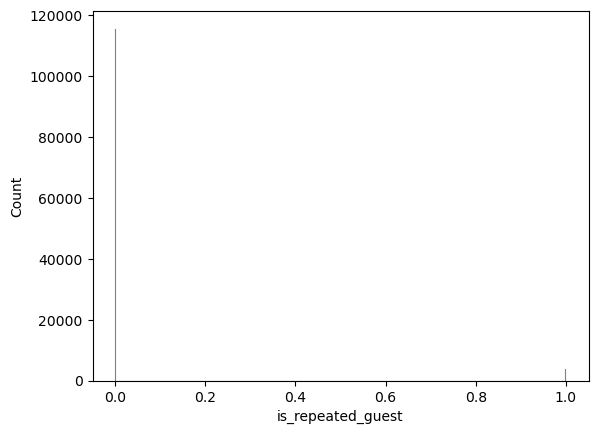

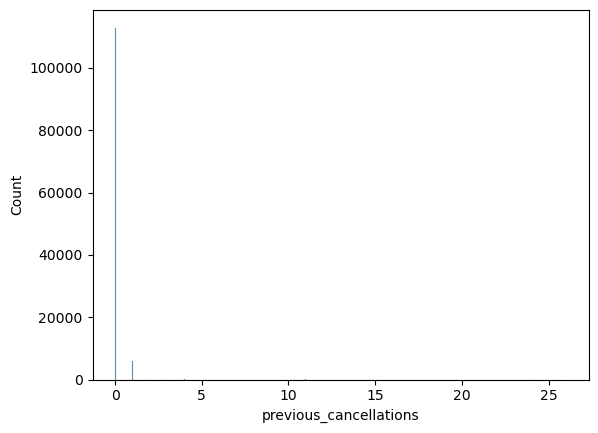

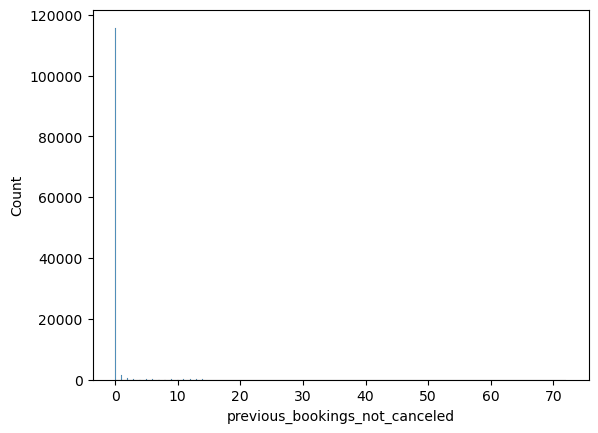

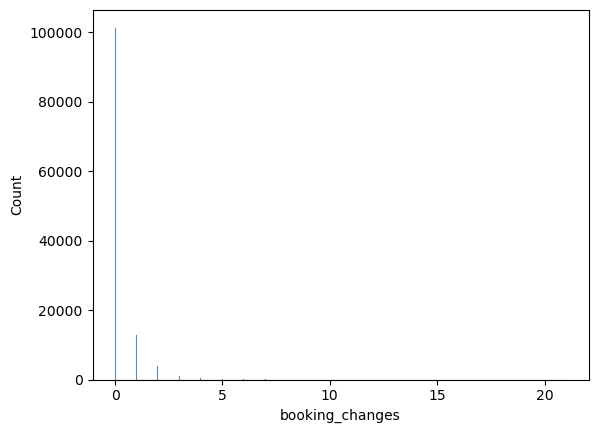

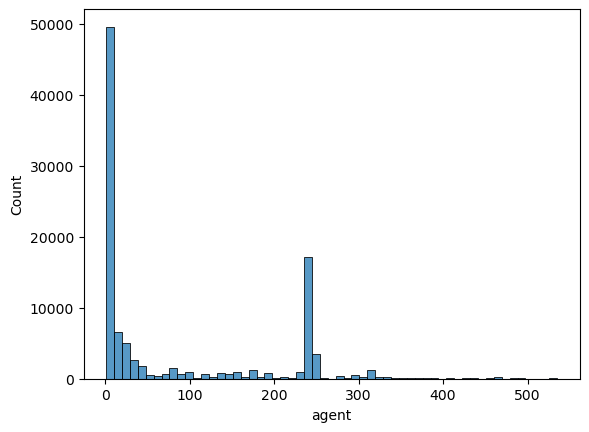

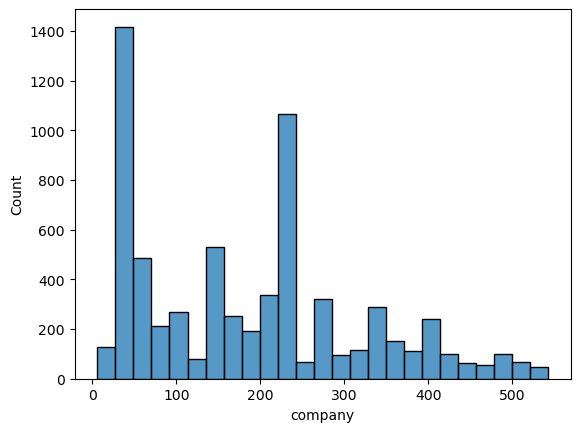

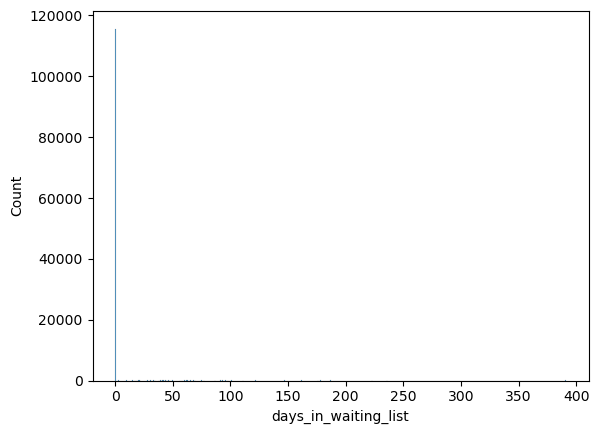

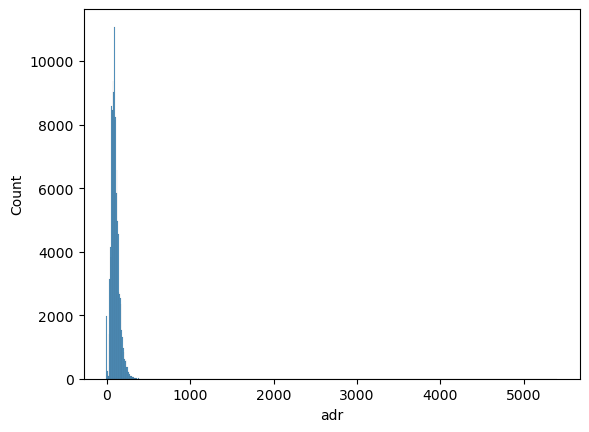

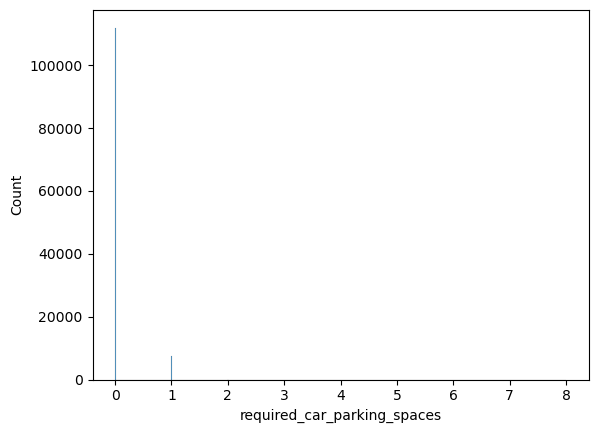

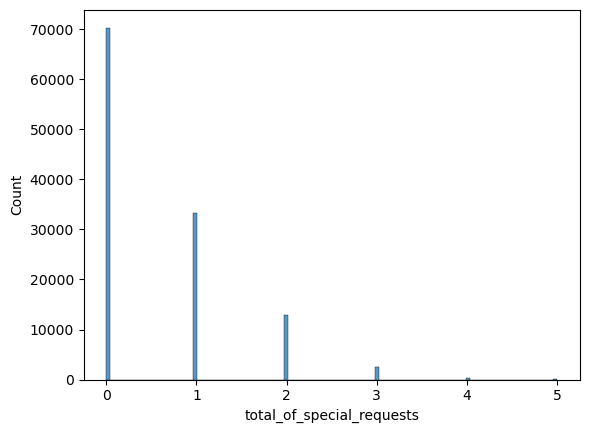

In [18]:
for col in data.select_dtypes("number").columns:
    sns.histplot(data[col])
    plt.show();

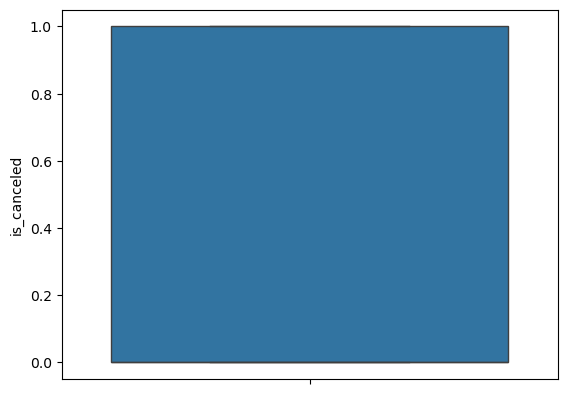

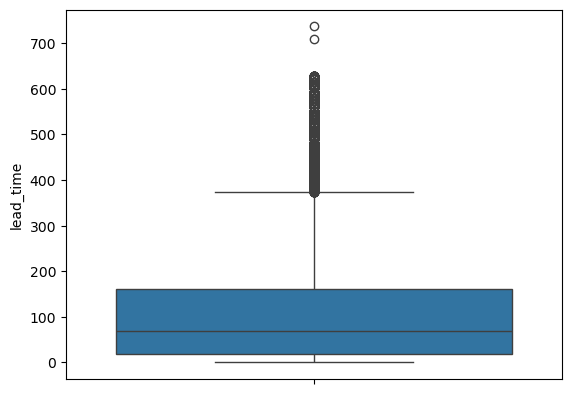

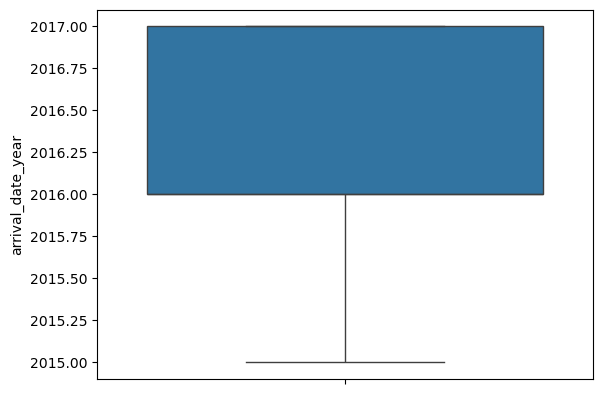

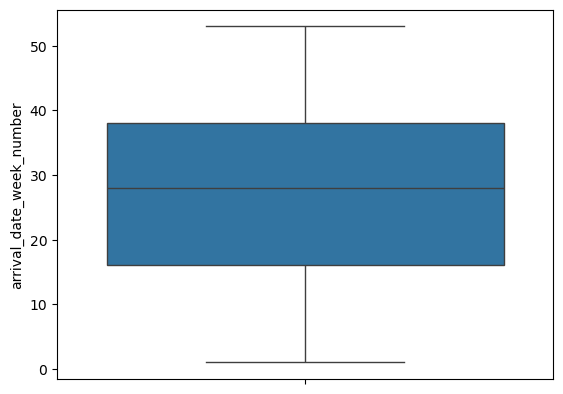

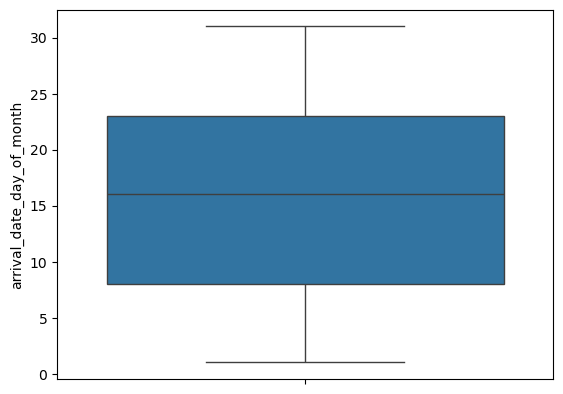

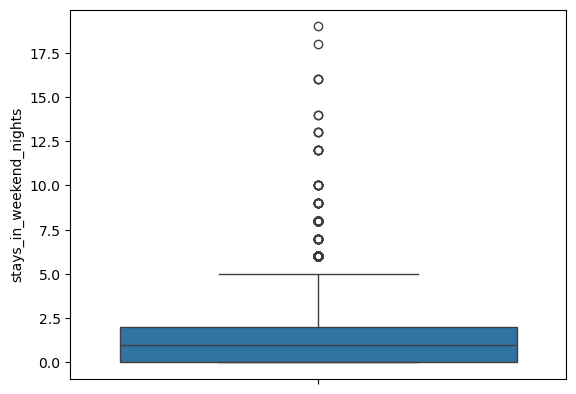

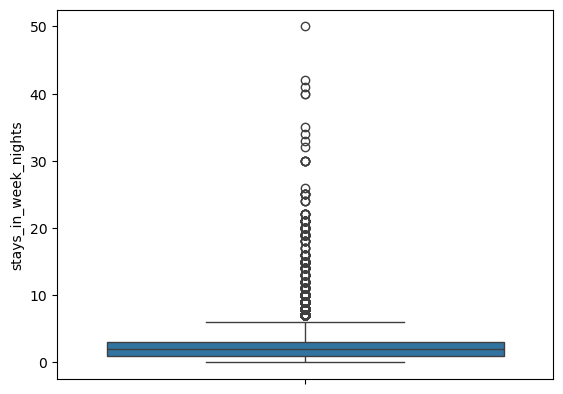

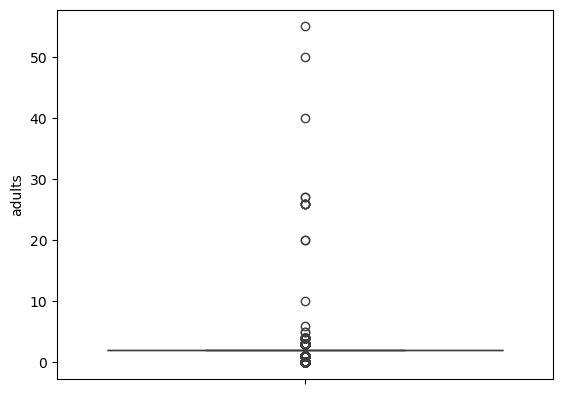

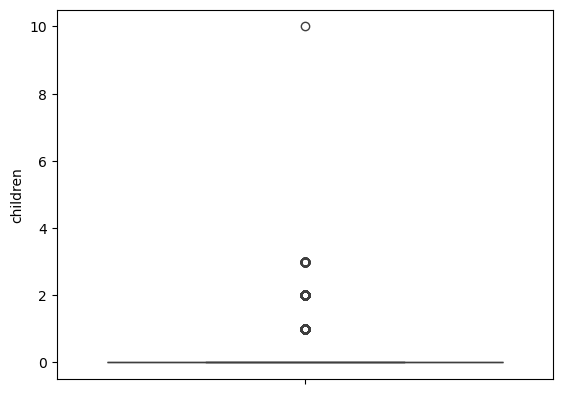

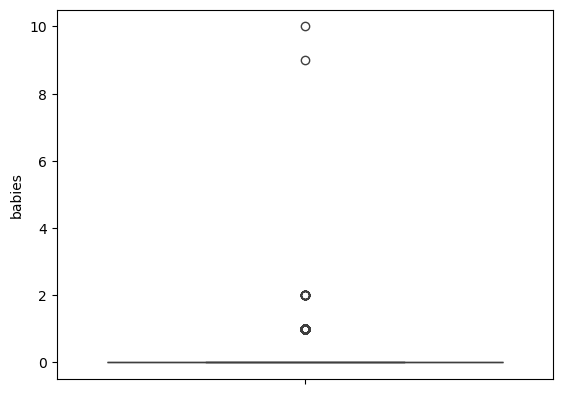

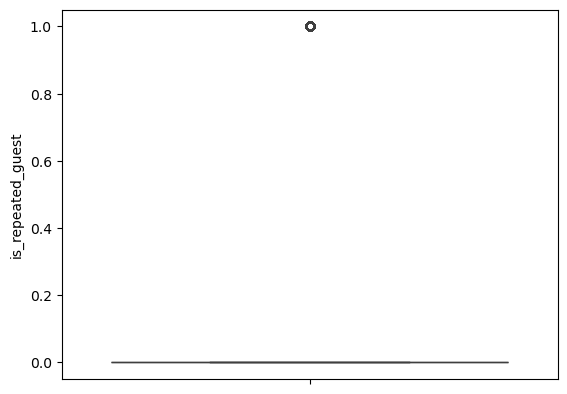

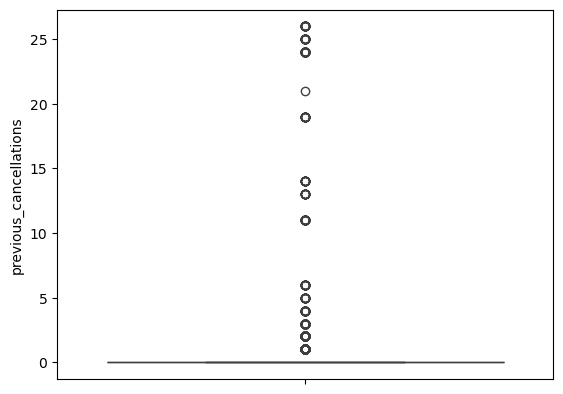

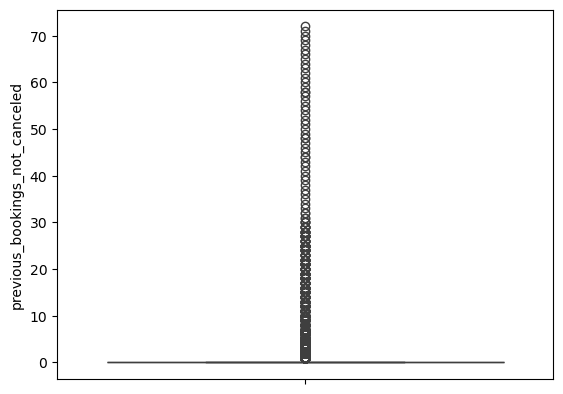

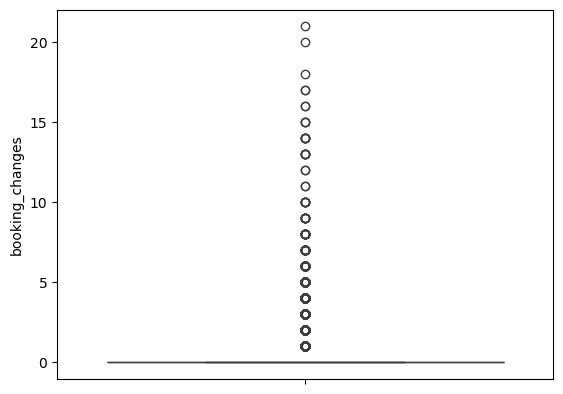

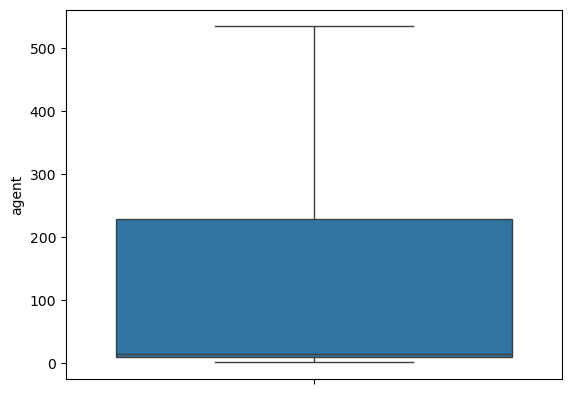

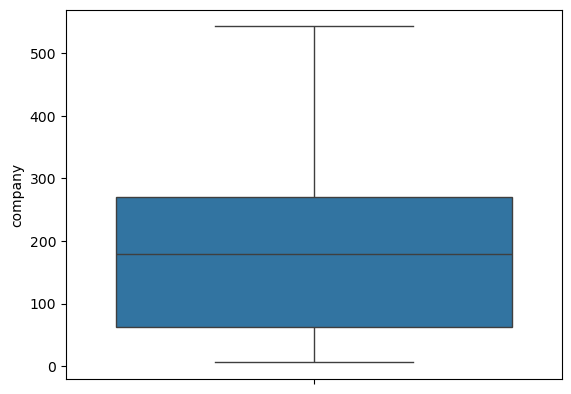

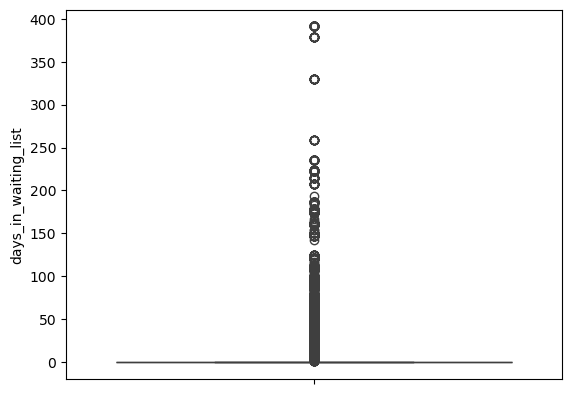

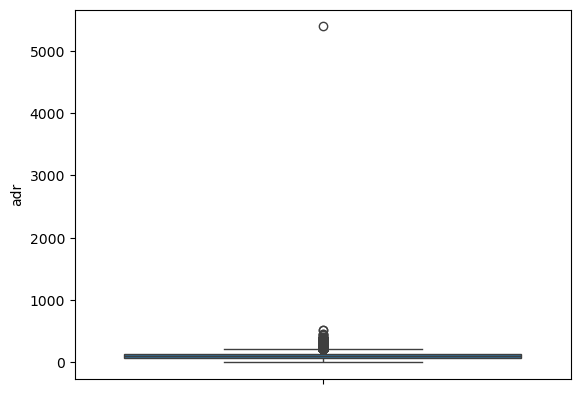

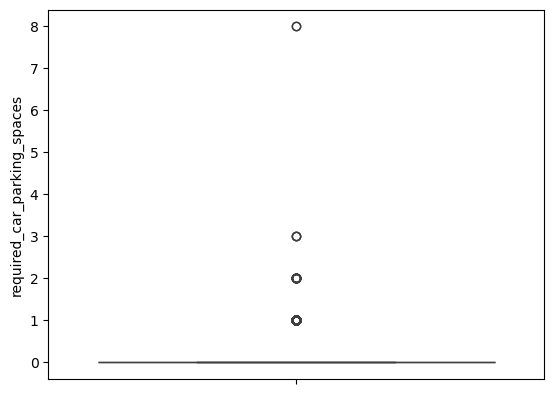

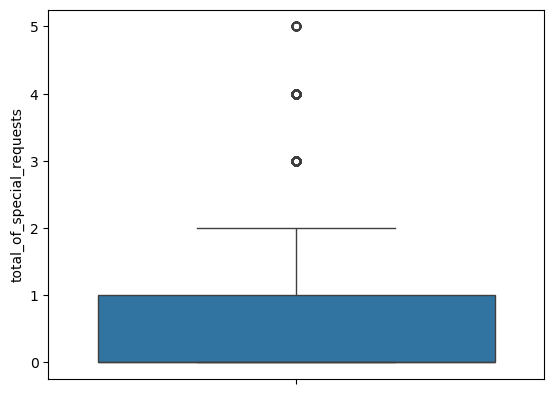

In [19]:
for col in data.select_dtypes("number").columns:
    sns.boxplot(data[col])
    plt.show()

Based on these graphs:
- is_cancelled is distributed evenly enough.
- lead_time is heavily skewed, with most of the customers needing 0 to 175 days, more or less, to convert, but some needing over 600, or even more than 700 days.
- the bulk of our data is from 2016, with 2017 being the second most common year, and 2015 coming in third.
- customers seem to prefer arriving in from late spring to early autumn, according to our weeks column, with july being very popular, and december and january much less so.
- day of the week does not seem to play a major role - the data distribution seems uniform. There are less arrival on 31st day of the month, but that makes logical sense, given that only 7 months in a year have 31 days.
- most of our customers stay for one weekend or less (only week days), but some stay for many weekends. This is clear, since most of the stays_in_weekend_nights column values range from 0 to 2, but some go higher than 10, even up to 18.
- most of our customers stay for up to a few week nights, but some stay for more than 20, even 50.
- most of our customers book as one pair of adults, but some book alone, and some bookings have dozens of adults. These may be groups, but we will check that later.
- there are usually no children, including babies, but that's not always the case, and we have at least one clear outlier - 10 children/babies. This is worth looking into, as it might be a mistake/typo, since the number is so much higher than the rest of the dataset.
- only a fraction of our bookings come from repeating guests, but that is not necessarily bad or surprising. Just worth noting.
- most of our customers do not have any previous cancellations, but some have many, even more than 20. These individuals may be affecting our business in a negative way and skewing our perception of what the bulk of our customers really think of our company, and how they behave.
- most of our visitors do not have any previous bookings not cancelled, but we seem to have a handful of very loyal repeat customers, as some have over 50 previous bookings not cancelled.
- most of our visitors do not make any booking changes, and most of the other ones make one or two, but some make many - something like 10 to 20.
- the agent and company columns serve to identify where our customers come from, and it is clear that some of them bring more business than the others.
- the vast majority of our visitors spent zero days on the waiting list, but a handful spent around a full year, which is a lot!
- most of our bookings result in an adr of around 100, but some bring in thousands, and some even cost us a little.
- most of our visitors do not require any parking lots, and most of the other ones require only one, while a fraction demand more.
- most of our customers have no special requests, but 1-3 requests are relatively common, while 4-5 seem to represent the real outliers.

Now let's take a quick look at the correlation matrix.

In [20]:
def plot_correlation_matrix(df):
    numeric_df = df.select_dtypes("number")
    corr = numeric_df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, vmax=1, vmin=-1)
    plt.title("Correlation Matrix")
    plt.show();

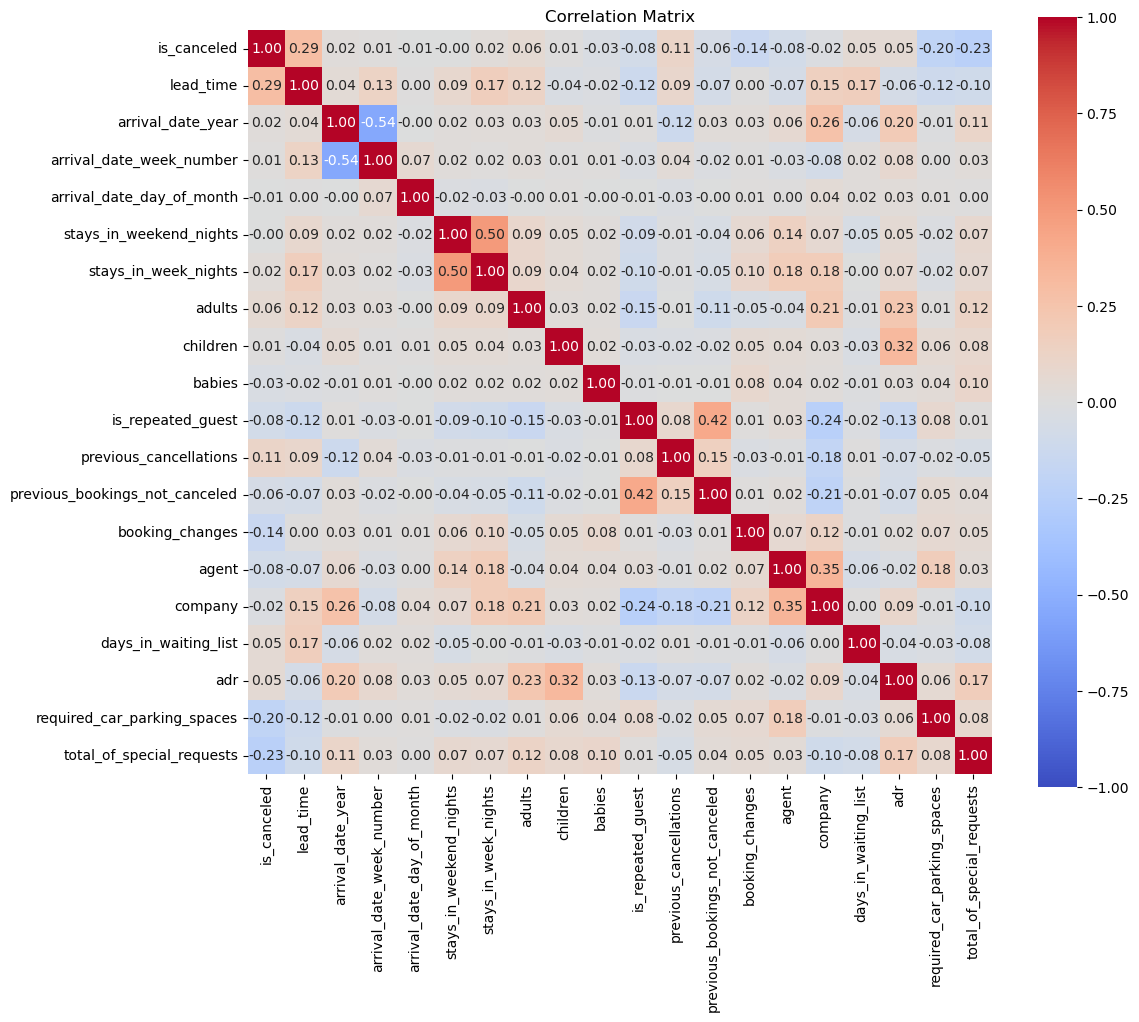

In [21]:
plot_correlation_matrix(data)

Most of the correlations are small to moderate, but there are some interesting insights. We will not analyze the whole matrix, as it is fairly large, but these are some of the most important insights:

- week number and year correlate strongly, but this information is irrelevant. This is likely because there is more data from 2016 than 2015 for instance. We should probably consider removing one of these two columns in training, depending on the goal of our training, since keeping both of them may result in redundancy, and therefore inferior results.
- children correlate well with adr, so we may want to attract more bookings with children.
- agent and company columns correlate well, but the meaning of that is not clear yet.
- year and company correlate, but that information is probably not overly useful.
- company also correlates with adults, so presumably some companies bring more adults.
- week nights correlate with weekend nights fairly well, so our customers likely tend to spend the weekend plus a few days before or after it at our hotels.
- lead time correlates with cancellations, so perhaps we could say that the longer a customer takes to convert, the more likely they are to cancel.

Now let's take a look at the categorical columns.

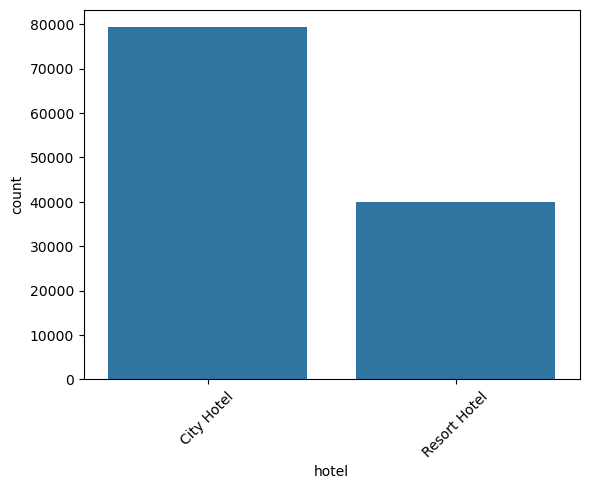

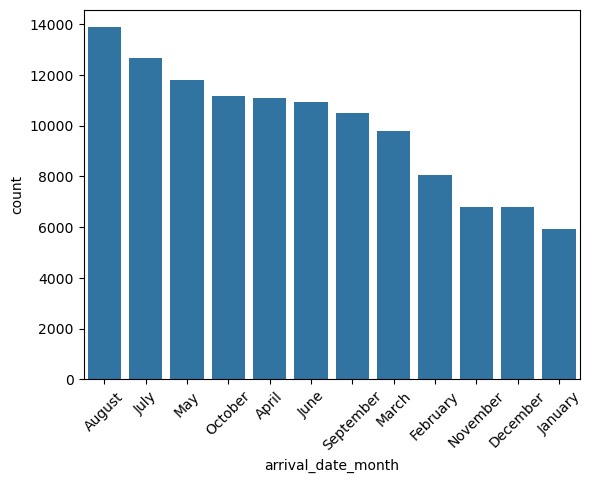

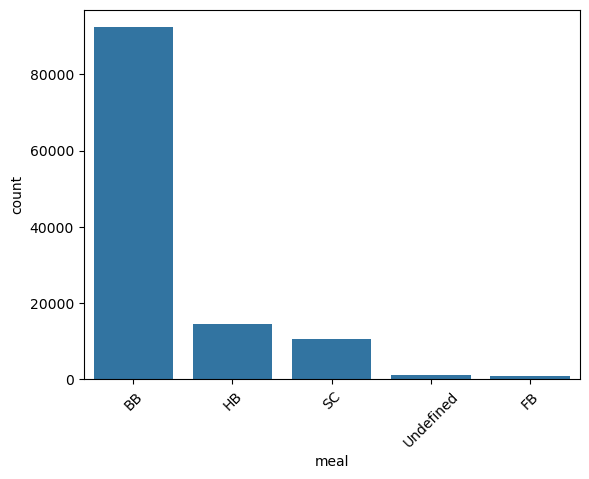

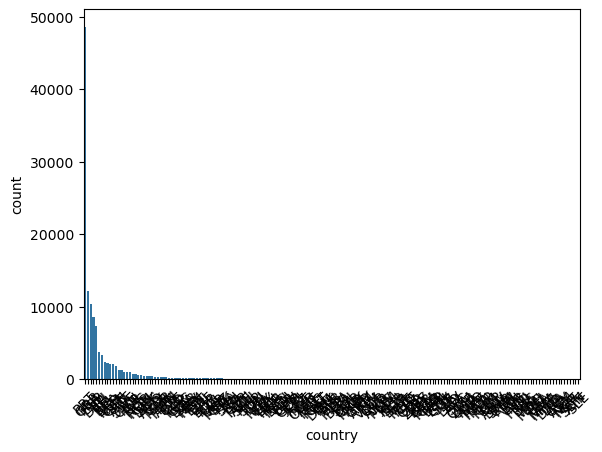

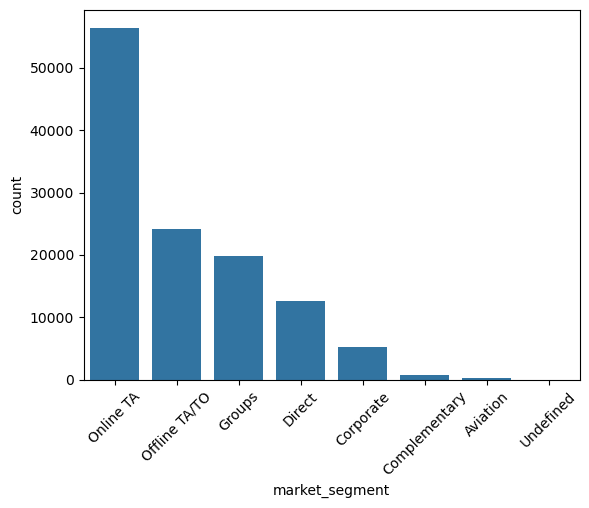

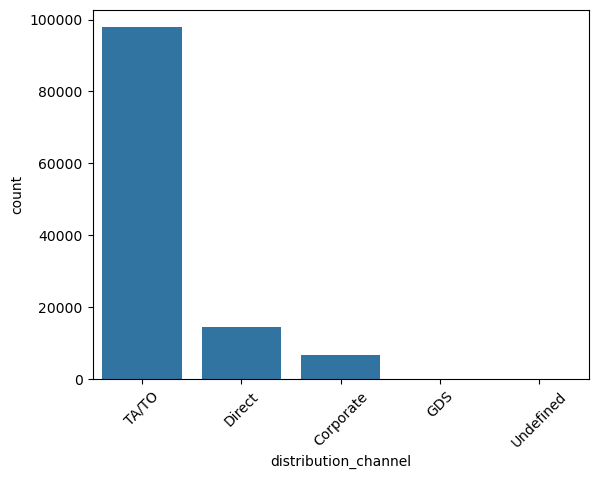

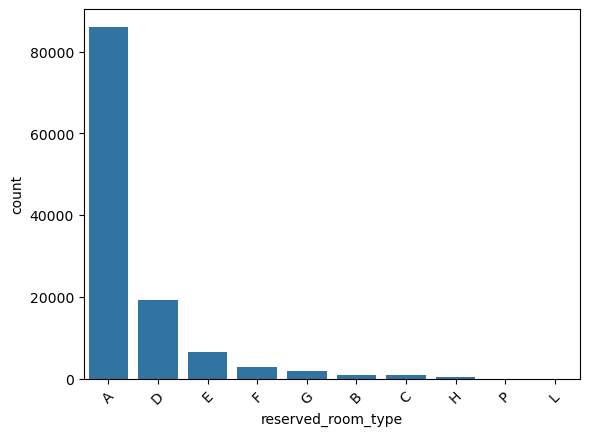

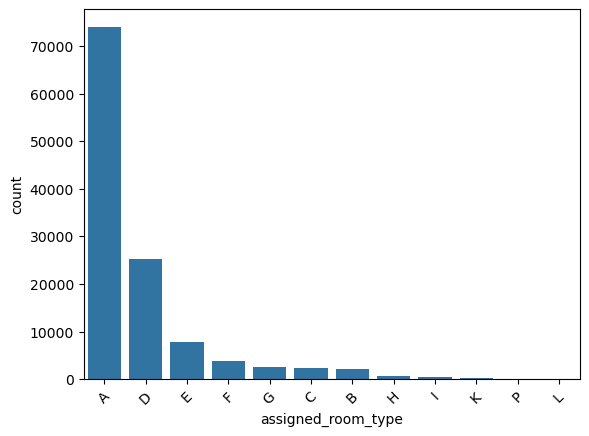

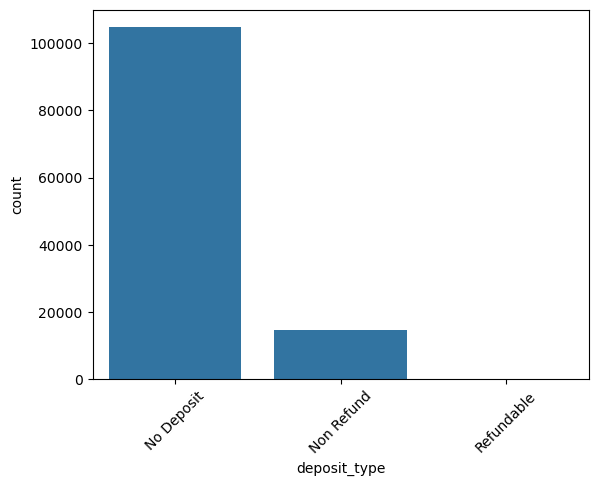

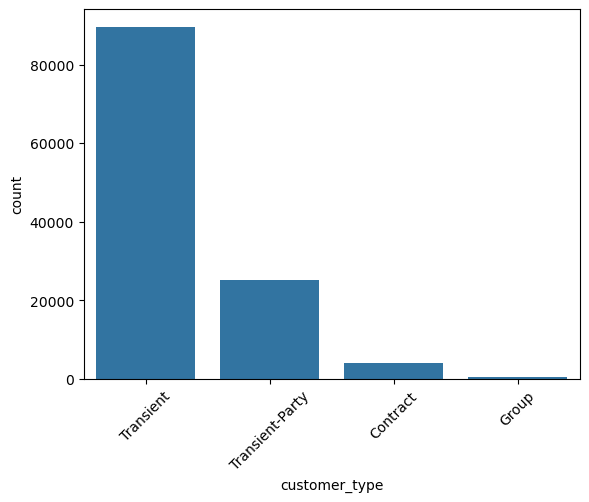

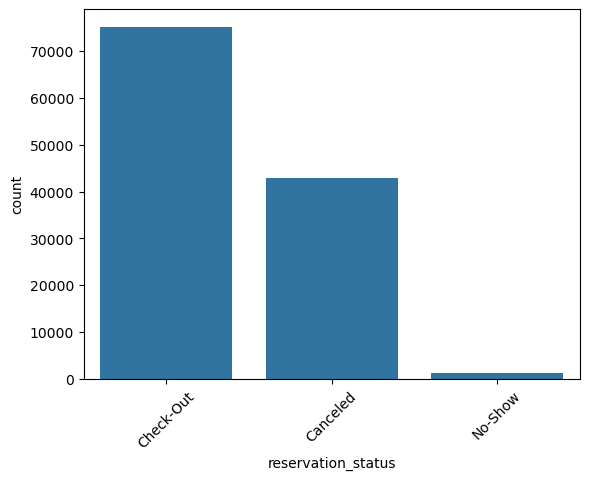

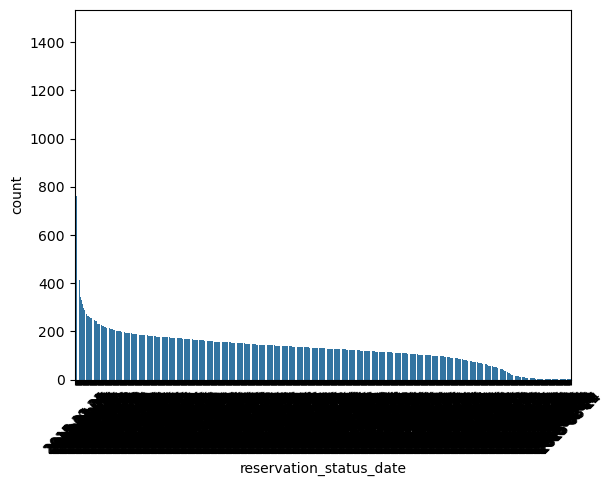

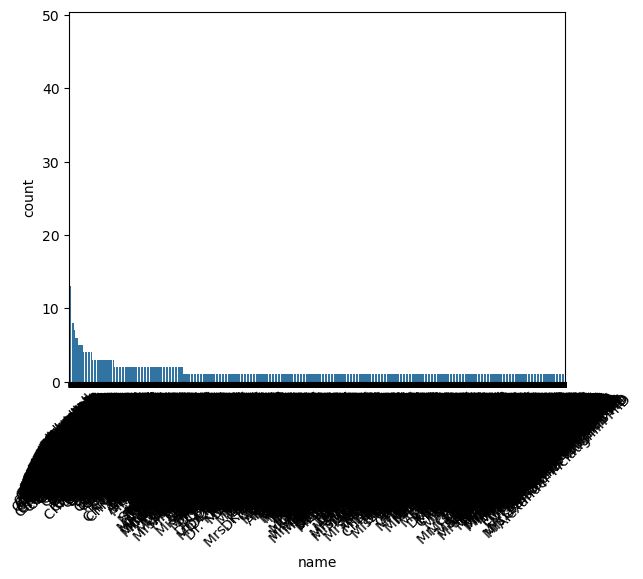

KeyboardInterrupt: 

In [22]:
for col in data.select_dtypes("object").columns:
    sns.barplot(data[col].value_counts())
    plt.xticks(rotation=45)
    plt.show();

Forgot to remove the last few columns, so had to interrupt the kernel.

We can reach the following conclusions:
- Roughly two thirds of our bookings are from our City Hotel, and the rest are from the Resort Hotel.
- As previously noted, bookings are a bit more common during the warm months than during winter.
- Most of our customers opt for the bed & breakfast meal option, but other options are common enough to be relevant.
- A bulk of our customers come from half a dozen countries, but the exact countries cannot be clearly read from the graph generated above, so we will look into that a bit further.
- Most of our customers come from travel agencies, or in groups, but some come directly, or by other means.
- Most of our customers reserve room type A and stay there, but there are less stays than reservations of room type A, which is interesting.
- Most of our customers do not deposit, and the ones that do almost always do it in a non-refundable way.
- Most of our customers are transient, but other types are not uncommon.
- Most of our customers check out, but we have a worrying number of cancellations, as well as a small portion of no-shows.

Let's look at the top countries now.

In [26]:
data["country"].value_counts(normalize=True).head()

country
PRT    0.408656
GBR    0.102008
FRA    0.087593
ESP    0.072059
DEU    0.061286
Name: proportion, dtype: float64

Portuguese customers make up our base, and we also have many visitors from Great Britain, France, Spain, and Germany.

Let's try to look for some clusters with KMeans, since it's easier to interpret compared to Agllomerative clustering and DBScan.

In [30]:
os.environ["OMP_NUM_THREADS"] = "1"

In [41]:
inertia = []
K = range(2, 21)

numerical_data = data.select_dtypes("number").dropna()

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(numerical_data)
    inertia.append(kmeans.inertia_)

c:\Users\Sebastijan\anaconda3\envs\hotel_management\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sebastijan\anaconda3\envs\hotel_management\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sebastijan\anaconda3\envs\hotel_management\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sebastijan\anaconda3\envs\hotel_management\Lib

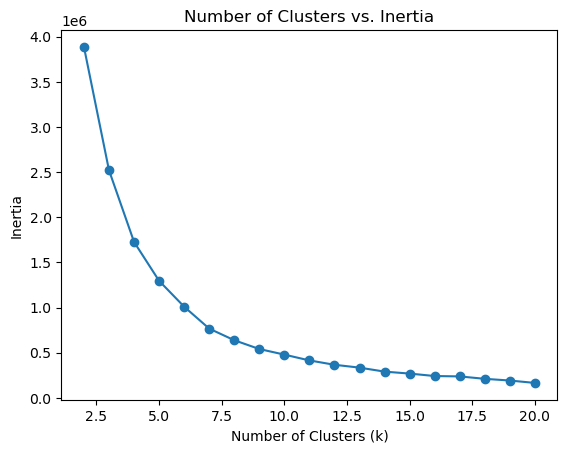

In [42]:
# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series = pd.Series(inertia, index=range(2, 21))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia")
plt.show();

Let's take a look at the main 4 clusters.

c:\Users\Sebastijan\anaconda3\envs\hotel_management\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


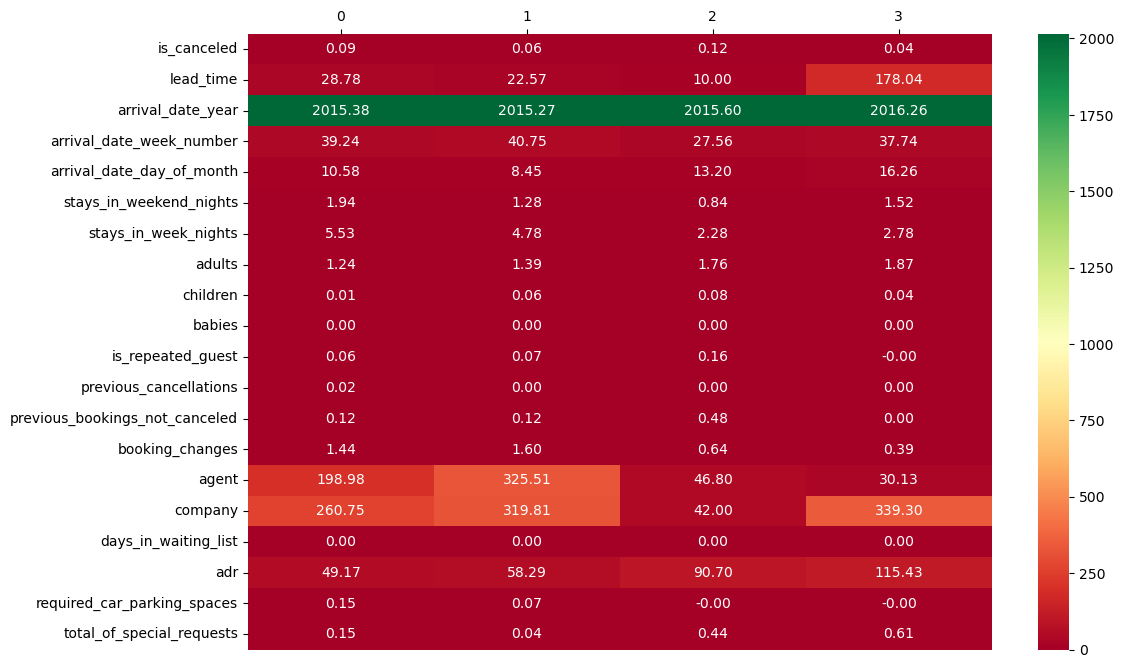

In [43]:
plt.figure(figsize=(12, 8))

kmeans4 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans4.fit(numerical_data)

ax = sns.heatmap(
    pd.DataFrame(kmeans4.cluster_centers_, columns=numerical_data.columns).T,
    annot=True,
    cmap='RdYlGn',
    fmt=".2f",
    vmin=0
)

ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
plt.show();

This is not very useful for now, as there are several variables that may not be all that relevant, but stick out nonetheless.

We will now try to reduce the memory usage and adjust types.

In [6]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# show min and max values of each numerical column
data.select_dtypes("number").agg(['min', 'max'])

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
min,0,0,2015,1,1,0,0,0,0.0,0,0,0,0,0,1.0,6.0,0,-6.38,0,0
max,1,737,2017,53,31,19,50,55,10.0,10,1,26,72,21,535.0,543.0,391,5400.00,8,5


In [8]:
# show lowest value counts of categorical columns
for col in data.select_dtypes("object").columns:
    print(f"Column: {col}")
    print(data[col].value_counts().nsmallest(5))
    print()

Column: hotel
hotel
Resort Hotel    40060
City Hotel      79330
Name: count, dtype: int64

Column: arrival_date_month
arrival_date_month
January     5929
December    6780
November    6794
February    8068
March       9794
Name: count, dtype: int64

Column: meal
meal
FB             798
Undefined     1169
SC           10650
HB           14463
BB           92310
Name: count, dtype: int64

Column: country
country
BWA    1
SMR    1
CYM    1
PLW    1
FJI    1
Name: count, dtype: int64

Column: market_segment
market_segment
Undefined            2
Aviation           237
Complementary      743
Corporate         5295
Direct           12606
Name: count, dtype: int64

Column: distribution_channel
distribution_channel
Undefined        5
GDS            193
Corporate     6677
Direct       14645
TA/TO        97870
Name: count, dtype: int64

Column: reserved_room_type
reserved_room_type
L       6
P      12
H     601
C     932
B    1118
Name: count, dtype: int64

Column: assigned_room_type
assigned_room

We will use numbers in the comments to represent the rows and navigate more easily.

In [3]:
data_optimized = data.copy()

In [11]:
data["children"].isna().sum()

np.int64(4)

In [29]:
print(data["children"].mean())
print(data["children"].median())

0.10388990333874994
0.0


Children has only 4 na values, so we can probably safely fill them in with 0, which is the median, as well as the mean, if we round it.

In [4]:
# 0 hotel -> will convert to type category for now
data_optimized["hotel"] = data["hotel"].astype("category")

# 1 is_canceled -> binary, so will convert to np.int8 to save memory
data_optimized["is_canceled"] = data["is_canceled"].astype(np.int8)

# 2 lead_time -> np.int16 should be enough, since it ranges from 0 to 737
data_optimized["lead_time"] = data["lead_time"].astype(np.int16)

# 3 arrival_date_year -> np.int16 should be enough, since it ranges from 2015 to 2017. Will likely either drop or create dummy variables later
data_optimized["arrival_date_year"] = data["arrival_date_year"].astype(np.int16)

# 4 arrival_date_month -> will convert to type category for now. Later can either create dummy variables or convert to numerical values (1-12)
data_optimized["arrival_date_month"] = data["arrival_date_month"].astype("category")

# 5 arrival_date_week_number -> np.int8 should be enough, since it ranges from 1 to 53, and that will not change
data_optimized["arrival_date_week_number"] = data["arrival_date_week_number"].astype(np.int8)

# 6 arrival_date_day_of_month -> np.int8 should be enough, since it ranges from 1 to 31, and that will not change
data_optimized["arrival_date_day_of_month"] = data["arrival_date_day_of_month"].astype(np.int8)

# 7 stays_in_weekend_nights -> np.int8 should be enough, since it ranges from 0 to 19
data_optimized["stays_in_weekend_nights"] = data["stays_in_weekend_nights"].astype(np.int8)

# 8 stays_in_week_nights -> np.int8 should be enough, since it ranges from 0 to 50
data_optimized["stays_in_week_nights"] = data["stays_in_week_nights"].astype(np.int8)

# 9 adults -> np.int16 should be optimal, since it ranges from 0 to 55, but outliers may exceed np.int8 range in the future
data_optimized["adults"] = data["adults"].astype(np.int16)

# 10 children -> can safely convert to np.int8 after filling NaNs, since it ranges from 0 to 10 and has only 4 NaNs
data_optimized["children"] = data["children"].fillna(0).astype(np.int8)

# 11 babies -> np.int8 should be enough, since it ranges from 0 to 10
data_optimized["babies"] = data["babies"].astype(np.int8)

# 12 meal -> will convert to type category for now
data_optimized["meal"] = data["meal"].astype("category")

# 13 country -> will convert to type category for now
data_optimized["country"] = data["country"].astype("category")

# 14 market_segment -> will convert to type category for now
data_optimized["market_segment"] = data["market_segment"].astype("category")

# 15 distribution_channel -> will convert to type category for now
data_optimized["distribution_channel"] = data["distribution_channel"].astype("category")

# 16 is_repeated_guest -> binary, so will convert to np.int8 to save memory
data_optimized["is_repeated_guest"] = data["is_repeated_guest"].astype(np.int8)

# 17 previous_cancellations -> np.int8 should be enough, since it ranges from 0 to 26
data_optimized["previous_cancellations"] = data["previous_cancellations"].astype(np.int8)

# 18 previous_bookings_not_canceled -> np.int8 should be enough, since it ranges from 0 to 72
data_optimized["previous_bookings_not_canceled"] = data["previous_bookings_not_canceled"].astype(np.int8)

# 19 reserved_room_type -> will convert to type category for now
data_optimized["reserved_room_type"] = data["reserved_room_type"].astype("category")

# 20 assigned_room_type -> will convert to type category for now
data_optimized["assigned_room_type"] = data["assigned_room_type"].astype("category")

# 21 booking_changes -> np.int8 should be enough, since it ranges from 0 to 21
data_optimized["booking_changes"] = data["booking_changes"].astype(np.int8)

# 22 deposit_type -> will convert to type category for now
data_optimized["deposit_type"] = data["deposit_type"].astype("category")

# 23 agent -> will convert to string for now, since it has NaNs. Later can either fill NaNs or convert to category after filling NaNs
data_optimized["agent"] = data["agent"].astype("string")

# 24 company -> will convert to string for now, since it has NaNs. Later can either fill NaNs or convert to category after filling NaNs
data_optimized["company"] = data["company"].astype("string")

# 25 days_in_waiting_list -> np.int16 should be enough, since it ranges from 0 to 391
data_optimized["days_in_waiting_list"] = data["days_in_waiting_list"].astype(np.int16)

# 26 customer_type -> will convert to type category for now
data_optimized["customer_type"] = data["customer_type"].astype("category")

# 27 adr -> np.float32 should be enough, since it ranges from -6.38 to 5400.0
data_optimized["adr"] = data["adr"].astype(np.float32)

# 28 required_car_parking_spaces -> np.int8 should be enough, since it ranges from 0 to 8
data_optimized["required_car_parking_spaces"] = data["required_car_parking_spaces"].astype(np.int8)

# 29 total_of_special_requests -> np.int8 should be enough, since it ranges from 0 to 5
data_optimized["total_of_special_requests"] = data["total_of_special_requests"].astype(np.int8)

# 30 reservation_status -> will convert to type category for now
data_optimized["reservation_status"] = data["reservation_status"].astype("category")

# 31 reservation_status_date -> convert to datetime
data_optimized["reservation_status_date"] = pd.to_datetime(data["reservation_status_date"])

# 32 name -> will convert to type string for now
data_optimized["name"] = data["name"].astype("string")

# 33 email -> will convert to type string for now
data_optimized["email"] = data["email"].astype("string")

# 34 phone-number -> will convert to type string for now
data_optimized["phone-number"] = data["phone-number"].astype("string")

# 35 credit_card -> will convert to type string for now
data_optimized["credit_card"] = data["credit_card"].astype("string")

In [6]:
# check new memory usage

data_optimized.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  category      
 1   is_canceled                     119390 non-null  int8          
 2   lead_time                       119390 non-null  int16         
 3   arrival_date_year               119390 non-null  int16         
 4   arrival_date_month              119390 non-null  category      
 5   arrival_date_week_number        119390 non-null  int8          
 6   arrival_date_day_of_month       119390 non-null  int8          
 7   stays_in_weekend_nights         119390 non-null  int8          
 8   stays_in_week_nights            119390 non-null  int8          
 9   adults                          119390 non-null  int16         
 10  children                        119390 non-null  int8   

In [22]:
# Let's see which columns still have na values
data_optimized.isna().sum()[data_optimized.isna().sum() > 0]

country       488
agent       16340
company    112593
dtype: int64

In [23]:
# Country has 488 NaN values, but also some countries with only 1 or 2 occurrences. Let's see how many countries have less than 10 occurrences
data_optimized["country"].value_counts()[data_optimized["country"].value_counts() < 10].size

81

In [5]:
# Add category "Other" if not present
if "Other" not in data_optimized["country"].cat.categories:
    data_optimized["country"] = data_optimized["country"].cat.add_categories("Other")

# Fill NaN with Other
data_optimized["country"] = data_optimized["country"].fillna("Other")

# Identify rare categories (fewer than 10)
counts = data_optimized["country"].value_counts()
rare_countries = counts[counts < 10].index

# Set rare countries to Other
data_optimized.loc[data_optimized["country"].isin(rare_countries), "country"] = "Other"

# Remove unused categories
data_optimized["country"] = data_optimized["country"].cat.remove_unused_categories()

In [25]:
data_optimized["country"].value_counts().sort_values().head()

country
CMR    10
MKD    10
BOL    10
SEN    11
PRI    12
Name: count, dtype: int64

In [26]:
data_optimized.loc[data_optimized["country"] == "Other"].agg({'hotel':'count'})

hotel    738
dtype: int64

We still have to deal with the missing values in the agent and company columns. We will try to figure out what is happening there.

In [33]:
# isolate the rows where agent is na    
na_agents = data_optimized[data_optimized["agent"].isna()]

# isolate the rows where company is na    
na_company = data_optimized[data_optimized["company"].isna()]

# isolate the rows where agent is not na
not_na_agents = data_optimized[~data_optimized["agent"].isna()]

# isolate the rows where company is not na
not_na_company = data_optimized[~data_optimized["company"].isna()]

In [37]:
not_na_company["market_segment"].value_counts(normalize=True)

market_segment
Corporate        0.657790
Groups           0.204649
Complementary    0.046050
Aviation         0.031190
Direct           0.030602
Offline TA/TO    0.015595
Online TA        0.014124
Undefined        0.000000
Name: proportion, dtype: float64

In [41]:
na_company["market_segment"].value_counts(normalize=True)

market_segment
Online TA        0.500750
Offline TA/TO    0.214161
Groups           0.163598
Direct           0.110113
Corporate        0.007318
Complementary    0.003819
Aviation         0.000222
Undefined        0.000018
Name: proportion, dtype: float64

The market segment values in rows where company not missing tend to say corporate, while the ones where company is missing tend to say online or offline TA/TO. Perhaps we could just proclaim these values as undefined and not use them wherever company is relevant. It seems implicative that the rows where company is missing simply do not have it for a reason - no company was involved in the lead in most of those cases.

In [39]:
not_na_agents["market_segment"].value_counts(normalize=True)

market_segment
Online TA        0.544677
Offline TA/TO    0.231247
Groups           0.151994
Direct           0.064037
Corporate        0.006803
Complementary    0.001000
Aviation         0.000243
Undefined        0.000000
Name: proportion, dtype: float64

In [40]:
na_agents["market_segment"].value_counts(normalize=True)

market_segment
Direct           0.367625
Corporate        0.281151
Groups           0.253856
Complementary    0.039168
Offline TA/TO    0.023807
Online TA        0.021297
Aviation         0.012974
Undefined        0.000122
Name: proportion, dtype: float64

In [43]:
na_agents["company"].value_counts(normalize=True, dropna=False).head(10)

company
<NA>     0.597307
40.0     0.056548
223.0    0.047919
67.0      0.01634
45.0     0.015239
153.0    0.013158
174.0    0.009119
219.0    0.008629
154.0     0.00814
233.0    0.006977
Name: proportion, dtype: Float64

In [44]:
# isolate the rows where agent is na and company is na
na_agents_company = data_optimized[data_optimized["agent"].isna() & data_optimized["company"].isna()]

In [45]:
na_agents_company["market_segment"].value_counts(normalize=True)

market_segment
Direct           0.596311
Groups           0.282582
Complementary    0.033709
Offline TA/TO    0.030840
Online TA        0.030328
Corporate        0.026025
Undefined        0.000205
Aviation         0.000000
Name: proportion, dtype: float64

It seems like these na values are not really missing. The most likely explanation is that many customers simply did not use any company or agents in the process of booking, or at least there was no company involved. Using the Ocham's razor principle, we can assume that that is the case indeed. Hence, we will keep those rows, and just convert the missing values to a string "Unknown".

In [46]:
# convert the missing vaulues in agent and company to a new string 'Unknown'
data_optimized["agent"] = data_optimized["agent"].fillna("Unknown")
data_optimized["company"] = data_optimized["company"].fillna("Unknown")

In [48]:
# check that there are no more na values in data_optimized
data_optimized.isna().sum().sum()

np.int64(0)

We can now save this optimized dataset. We will do further exploration and dealing with outliers etc. separately for each of the models.

In [7]:
# save the cleaned data to a new parquet file
data_optimized.to_parquet("../data/hotel_booking_optimized.parquet", index=False)

## End of File